In [1]:
from sklearn.manifold import SpectralEmbedding, TSNE, MDS
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import umap
import matplotlib.pyplot as plt
import pandas as pd
import hdbscan
plt.rcParams.update({
    "figure.dpi": 150,   # higher resolution
    "font.size": 11,     # larger fonts
})

In [2]:
time_step = 212
phi = 0.40
lat_size = 100
T_ref = 300
p_ref = 5e05
isolevels = [2.5, 3, 3.5, 4, 4.5, 4.7]
n_isolevels = len(isolevels)

folder_name = f"data/nek/phi{phi:.2f}/h400x{lat_size}_ref"
file_name = "premix"

In [3]:
feature_setting = 0

if feature_setting:
    plot_title = "reaction"
else:
    plot_title = "state"

if feature_setting == 0:
    features = ['H2', 'O2', 'H2O', 'H', 'O', 'OH', 'HO2', 'H2O2']
else:
    features = [
        'omega_H2', 'omega_O2', 'omega_H2O', 'omega_H', 'omega_O', 'omega_OH',
        'omega_HO2', 'omega_H2O2', 'HRR'
    ]

n_neighbours = 100
c_val = isolevels[1]

front = pd.read_csv(
    f"../data/isocontours/phi{phi:.2f}/h400x{lat_size}_ref/"
    f"extracted_flame_front_{time_step}_iso_{c_val}.csv"
)

X_raw = front[features].to_numpy()

X_scaled = StandardScaler().fit_transform(X_raw)

C:\Users\alexp\Documents\Bachelor Thesis\Code\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


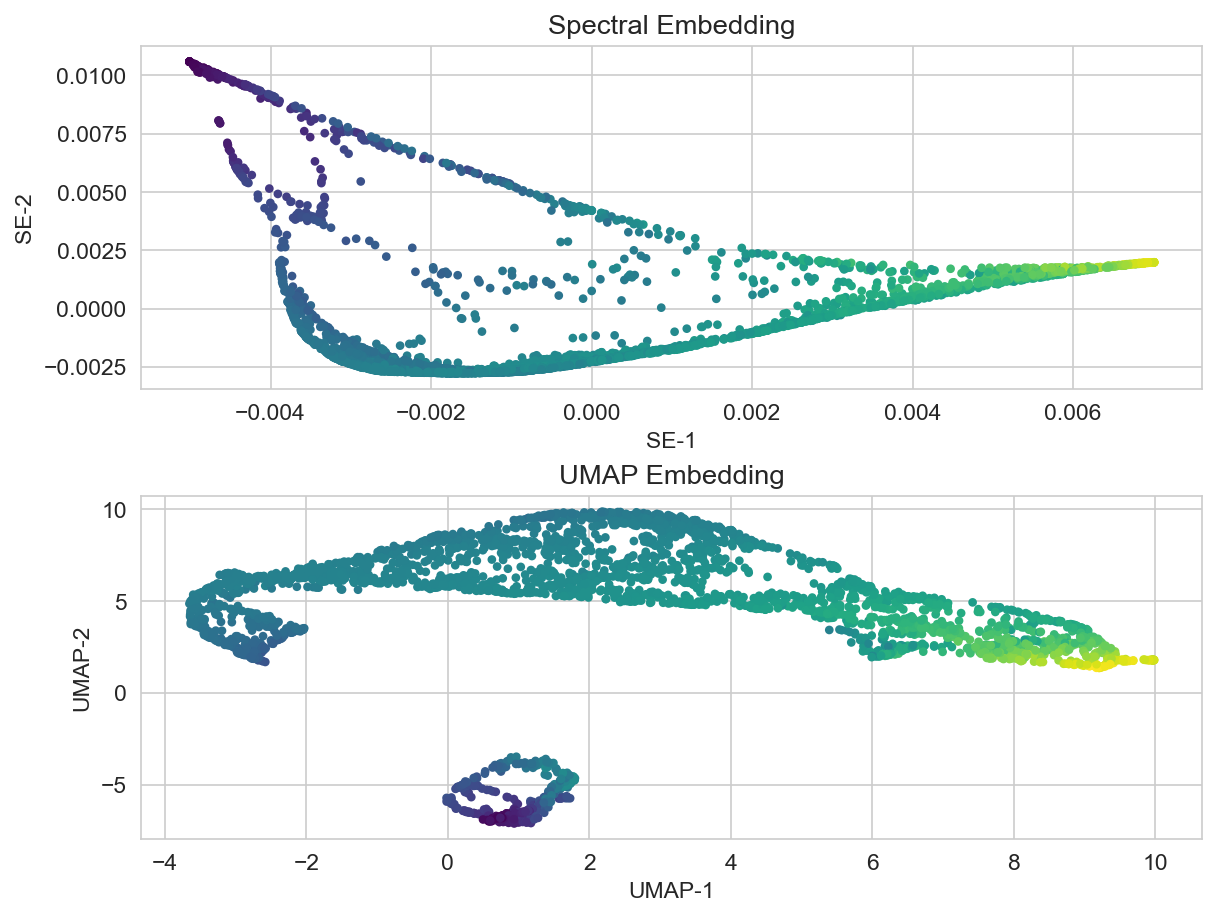

In [11]:
fig, (ax_se, ax_umap) = plt.subplots(
    2, 1, figsize=(8, 6), constrained_layout=True
)

SE = SpectralEmbedding(n_components=2, n_neighbors=30)
X_SE = SE.fit_transform(X_scaled)
# Plot
ax_se.scatter(X_SE[:, 0], X_SE[:, 1], c=front['HRR'], cmap='viridis', s=10)
ax_se.set_title("Spectral Embedding")
ax_se.set_xlabel("SE-1")
ax_se.set_ylabel("SE-2")

reducer = umap.UMAP(
    n_neighbors=200,
    n_components=2,
    random_state=42,
    init='spectral'
)
X_umap = reducer.fit_transform(X_scaled)
# Plot
ax_umap.scatter(X_umap[:, 0], X_umap[:, 1], c=front['HRR'], cmap='viridis', s=10)
ax_umap.set_title("UMAP Embedding")
ax_umap.set_xlabel("UMAP-1")
ax_umap.set_ylabel("UMAP-2")

plt.show()
